## Import libraries

In [95]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [7]:
df = pd.read_csv('diabetes.csv')

In [8]:
df.shape

(768, 9)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df.isnull().values.any()

False

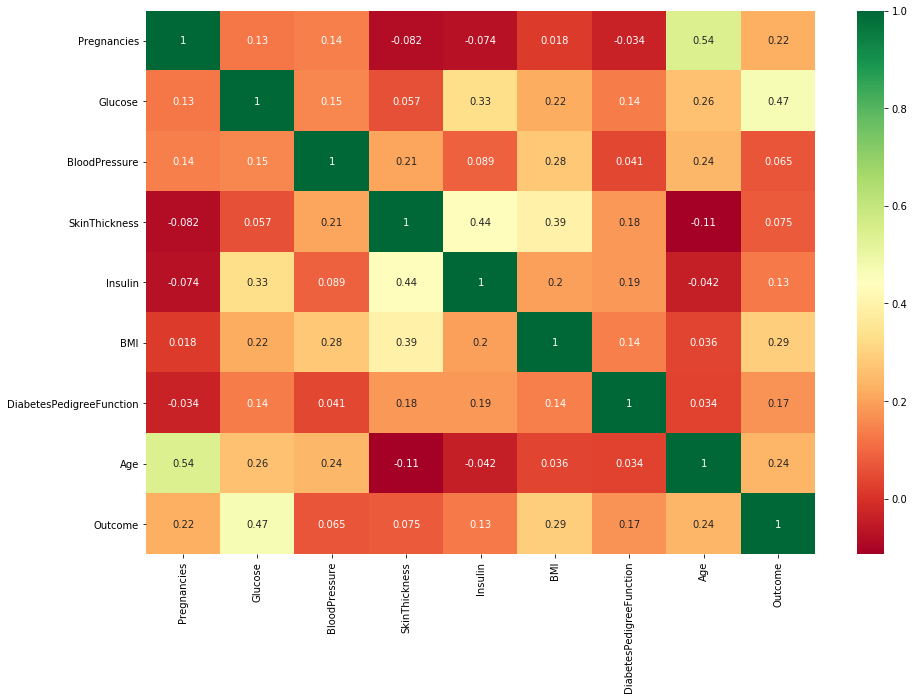

In [43]:
df.corr()
plt.figure(figsize=(15,10))
datplot = sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

In [47]:
y=df['Outcome']

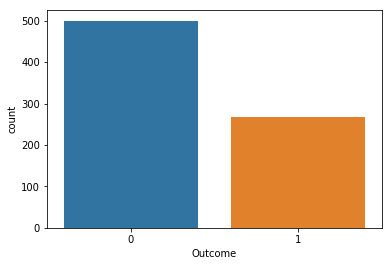

In [61]:
sns.countplot(x='Outcome',data=df)
plt.show()

In [62]:
X=df.drop(columns=['Outcome'],axis=1)
y=df['Outcome']

## splitting data into train and test

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [118]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


## Train the model

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [121]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2')
clf.fit(X=X_train,y=y_train)

SGDClassifier(eta0=0.0001, loss='log', random_state=15)

In [122]:
clf.score(X_train,y_train)

0.7703583061889251

In [125]:
pickle.dump(clf,open('model.pkl','wb'))

In [132]:
pickle.dump(scaler,open('transform.pkl','wb'))